<h2><center>Predicting the optimum number of clusters  of agiven 'IRIS' dataset and represent it visually</center></h2>

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [3]:
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['species']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


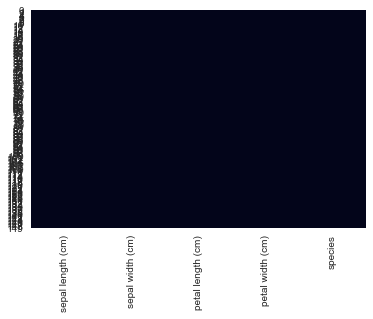

In [4]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=True)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [6]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## Exploratory Data Analysis

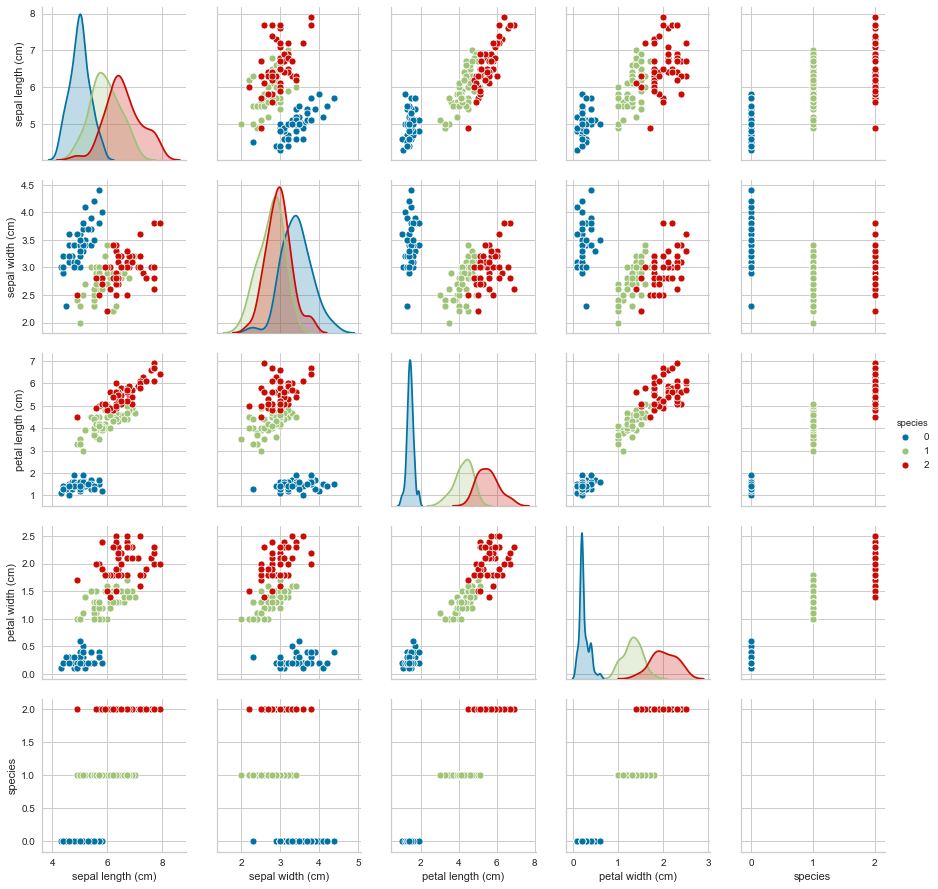

In [7]:
sns.pairplot(data=data,hue='species')

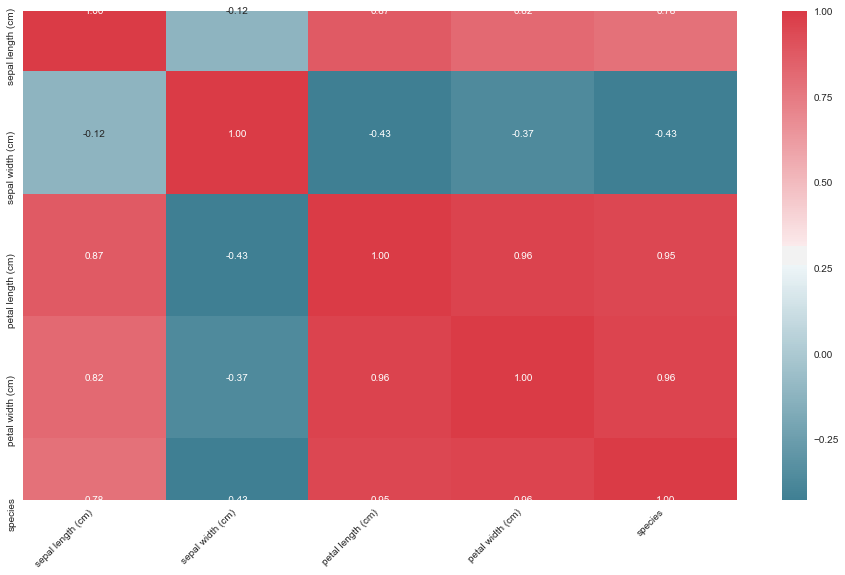

In [8]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(16,9))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,annot=True,fmt='.2f')
ax.set_xticklabels(data.columns,rotation=45,horizontalalignment='right')
plt.show()

In [9]:
setosa=data[data['species']==0]
versicolor=data[data['species']==1]
virginica=data[data['species']==2]

<Figure size 432x288 with 0 Axes>

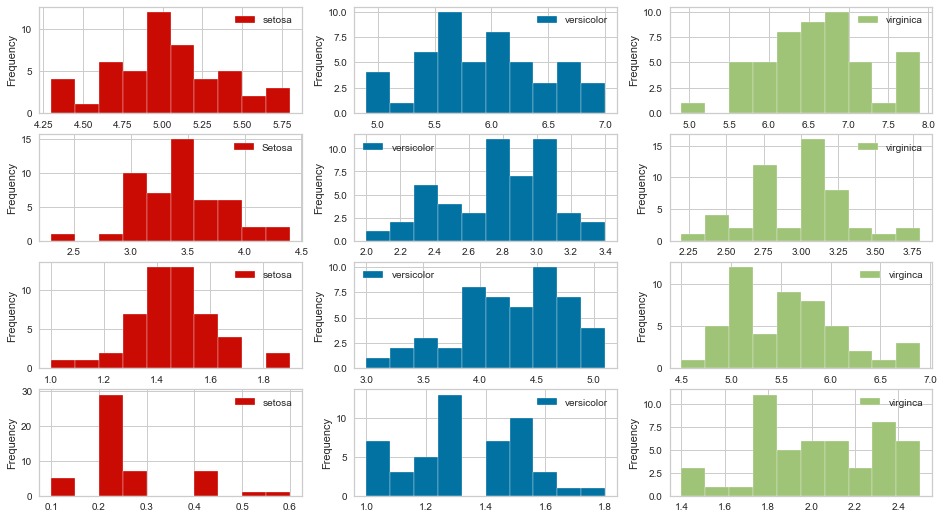

In [10]:
plt.figure()
fig,ax=plt.subplots(4,3,figsize=(16,9))

setosa['sepal length (cm)'].plot(kind='hist',ax=ax[0][0],label='setosa',color='r',fontsize=10)
versicolor['sepal length (cm)'].plot(kind='hist',ax=ax[0][1],label='versicolor',color='b',fontsize=10)
virginica['sepal length (cm)'].plot(kind='hist',ax=ax[0][2],label='virginica',color='g',fontsize=10)

setosa['sepal width (cm)'].plot(kind='hist',ax=ax[1][0],label='Setosa',color='r',fontsize=10)
versicolor['sepal width (cm)'].plot(kind='hist',ax=ax[1][1],label='versicolor',color='b',fontsize=10)
virginica['sepal width (cm)'].plot(kind='hist',ax=ax[1][2],label='virginica',color='g',fontsize=10)

setosa['petal length (cm)'].plot(kind='hist',ax=ax[2][0],label='setosa',color='r',fontsize=10)
versicolor['petal length (cm)'].plot(kind='hist',ax=ax[2][1],label='versicolor',color='b',fontsize=10)
virginica['petal length (cm)'].plot(kind='hist',ax=ax[2][2],label='virginca',color='g',fontsize=10)

setosa['petal width (cm)'].plot(kind='hist',ax=ax[3][0],label='setosa',color='r',fontsize=10)
versicolor['petal width (cm)'].plot(kind='hist',ax=ax[3][1],label='versicolor',color='b',fontsize=10)
virginica['petal width (cm)'].plot(kind='hist',ax=ax[3][2],label='virginca',color='g',fontsize=10)

for i in range(4):
    for j in range(3):
        ax[i][j].legend()

In [11]:
data.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

## Modelling with KMeans
### Finding optimal K 
### 1. Elbow-Method using WCSS(Within-Cluster Sum of Squares)

In [12]:
X=data.iloc[:,0:4].values

In [13]:
SSD=[]
K=range(1,11)
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(X)
    SSD.append(km.inertia_)

**Inertia**: It is defined as the mean sqaured distance between each instance and its closest centroid. 

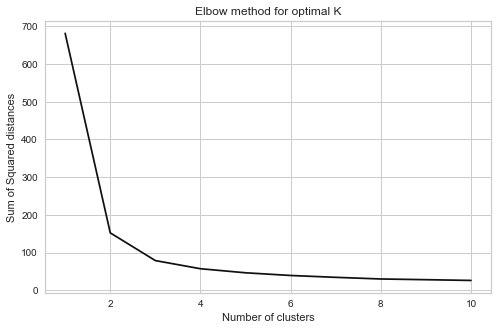

In [14]:
plt.figure(figsize=(8,5))
plt.plot(K,SSD,'k-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared distances')
plt.title('Elbow method for optimal K')
plt.show()

<h1>Cool! It's Three</h1>

### 2. Silhouette Coefficient method

In [15]:
KMean=KMeans(n_clusters=3)
KMean.fit(X)
label=KMean.predict(X)

print("Silhouette Score(n=3):",silhouette_score(X,label))

Silhouette Score(n=3): 0.552819012356409


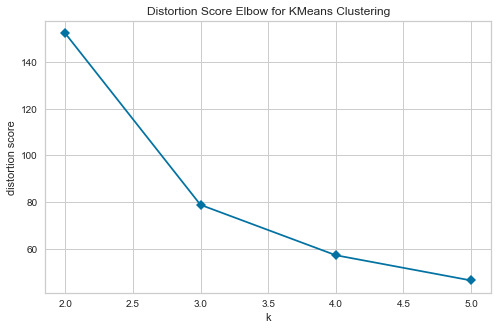

In [16]:
model=KMeans(random_state=123)
Visualizer=KElbowVisualizer(model,k=(2,6),metrics='silhouette',timings=False)
plt.figure(figsize=(8,5))
Visualizer.fit(X)
Visualizer.poof()

In [17]:
print(KMean.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [18]:
y_pred=KMean.labels_
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

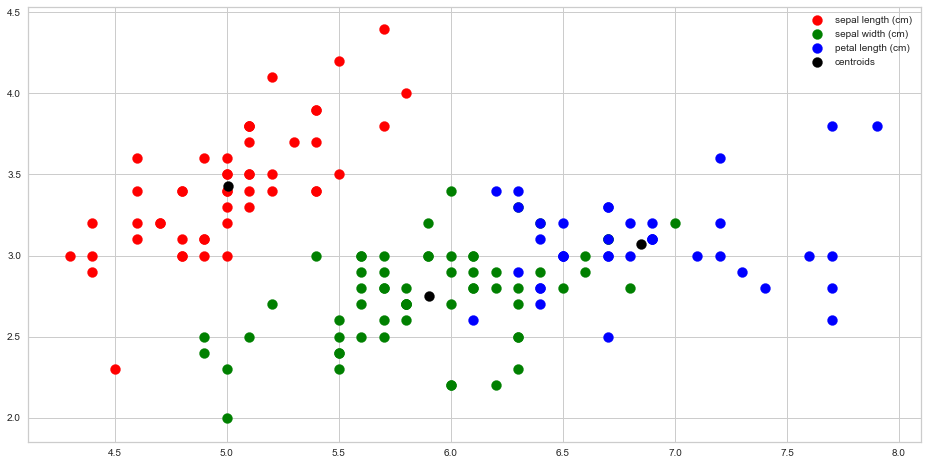

In [19]:
plt.figure(figsize=(16,8))
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.feature_names):
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],color=color,s=100,label=target)
plt.scatter(KMean.cluster_centers_[:,0],KMean.cluster_centers_[:,1],color='black',s=100,label='centroids')
plt.legend(loc='best',shadow=True,scatterpoints=1)
plt.show()